In [1]:
# Dependencies and setup
import numpy as np
import os
import pandas as pd
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
# Check unique values in target variable and assigne to target values
target_values = df['koi_disposition'].unique()
target_values

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Select your features (columns)

In [5]:
# Set features to be used as x values
features = df.drop(columns=['koi_disposition'])
X = features
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


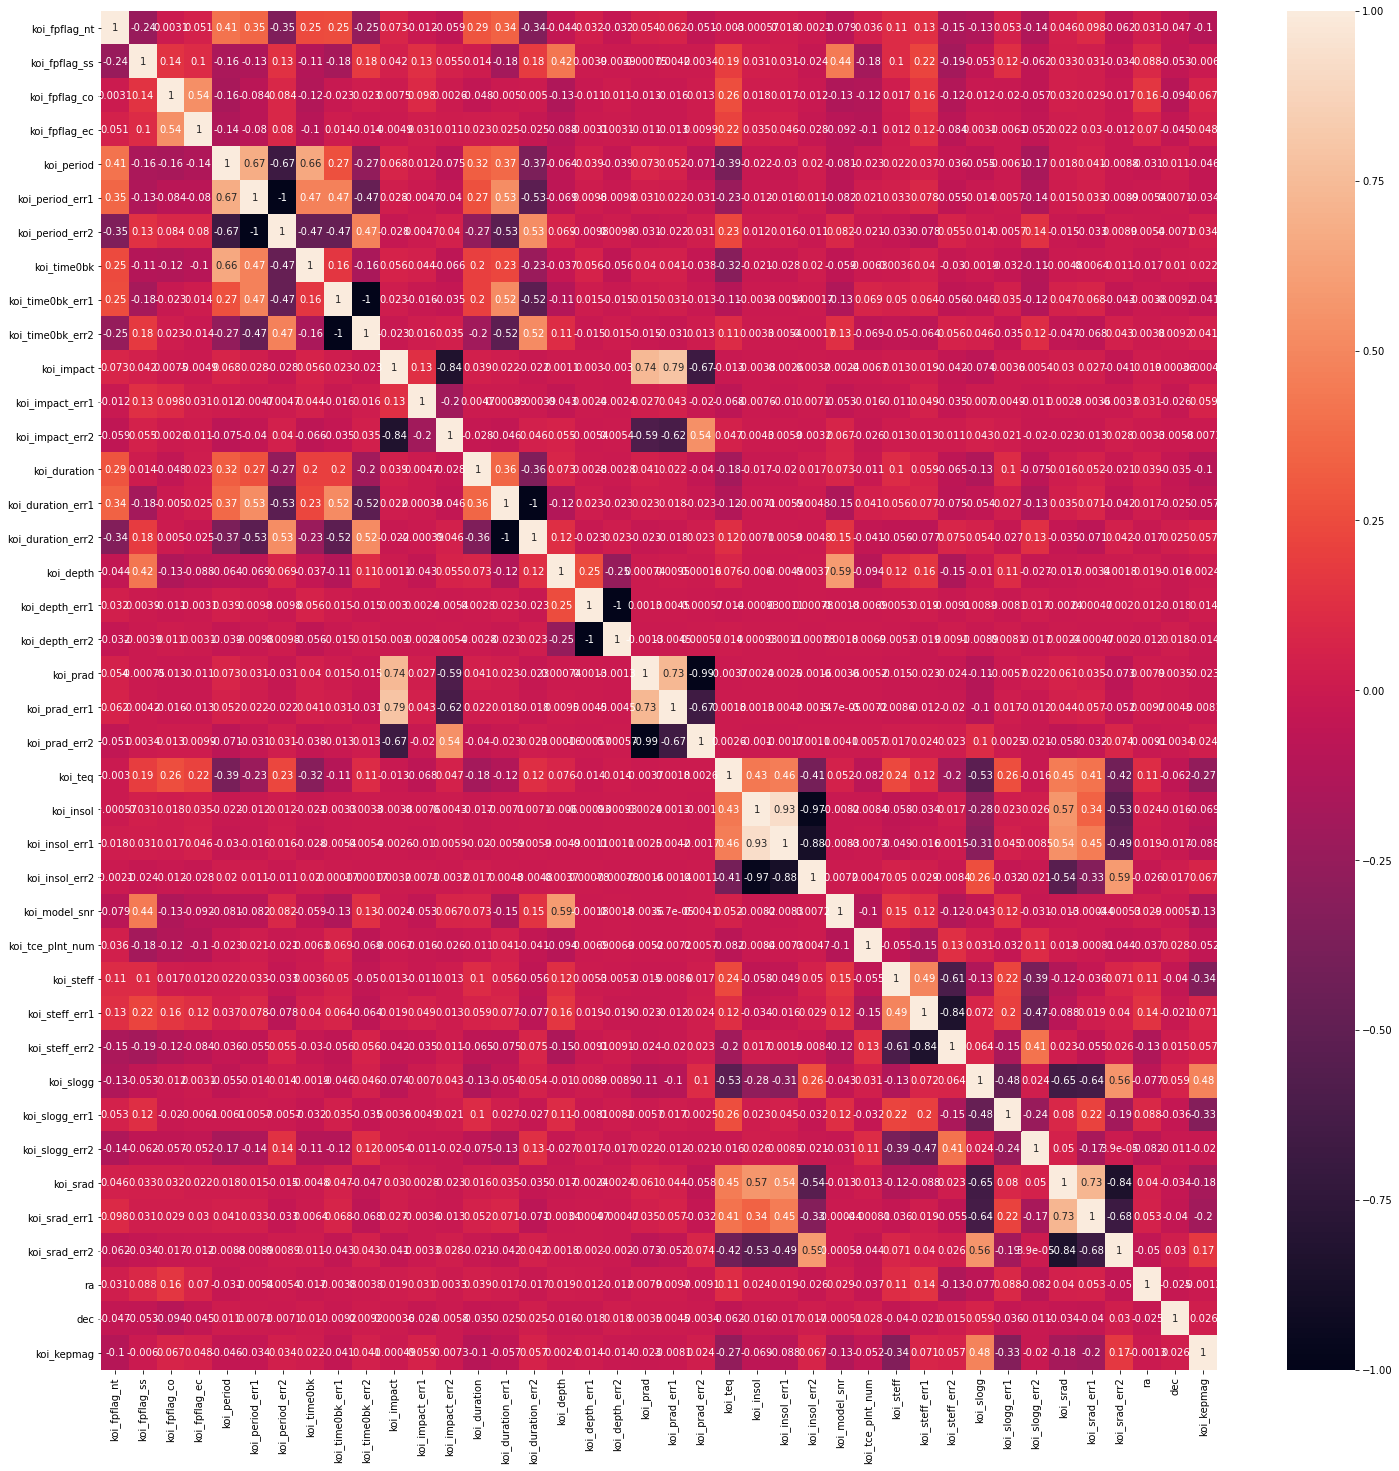

In [6]:
# Develop correlation matrix
X.corr()
corrMatrix = X.corr()

# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/featureCorrelation.png")

plt.show()

In [7]:
# Re-set features to be used as x values, given above correlation results
features = df.drop(columns=['koi_disposition','koi_period_err2', 'koi_time0bk_err2', 'koi_duration_err2', 'koi_depth_err2', 'koi_insol_err1'
                           ,'koi_insol_err2','koi_steff_err2'])
X = features
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,koi_impact_err1,...,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,0.586,0.059,...,81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,175.850252,0.000581,0.969,5.126,...,158,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,1.276,0.115,...,157,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,171.595550,0.001130,0.701,0.235,...,169,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,172.979370,0.001900,0.762,0.139,...,189,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
# Set y values
y = df['koi_disposition'].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 33) (6991, 1)


In [9]:
# Dependencies and setup
from sklearn.model_selection import train_test_split

# Use train-test split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,koi_impact_err1,...,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,133.077240,0.008440,0.150,0.305,...,154,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,132.020050,0.007950,0.291,0.193,...,158,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,134.460380,0.006190,0.970,0.879,...,151,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,174.662240,0.001820,0.300,0.145,...,76,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,172.258529,0.000083,0.831,0.016,...,77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler

In [10]:
#ensure all features are numeric
features.dtypes

koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_depth            float64
koi_depth_err1       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2       float64
koi_srad             float64
koi_srad_err1        float64
koi_srad_err2        float64
ra                   float64
dec                  float64
koi_kepmag           float64
dtype: object

In [11]:
# Dependencies and setup
from sklearn.preprocessing import MinMaxScaler

# Scale data
X_scale = MinMaxScaler().fit(X_train)
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

# Train the Model



In [13]:
# Dependencies and setup
from sklearn import tree

# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()

In [17]:
# Fit the model to the training data and calculate scores for training and testing data
clf = clf.fit(X_train_scaled, y_train)
clf_test_score = clf.score(X_test_scaled, y_test)
clf_train_score = clf.score(X_train_scaled, y_train)
print(f"Test Score: {clf_test_score}")
print(f"Train Score: {clf_train_score}")

Test Score: 0.8461098398169337
Train Score: 1.0


In [18]:
# Run the model again, using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf_test_score = rf.score(X_test_scaled, y_test)
rf_train_score = rf.score(X_train_scaled, y_train)
print(f"Test Score: {rf_test_score}")
print(f"Train Score: {rf_train_score}")

Test Score: 0.9038901601830663
Train Score: 1.0


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 200, 300]}

grid1 = GridSearchCV(rf, param_grid, verbose=3)

In [20]:
# Train the model with GridSearch
grid1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.912, total=   0.8s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.910, total=   0.8s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.888, total=   0.8s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.877, total=   0.8s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.883, total=   0.8s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.908, total=   1.6s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.903, total=   1.6s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.892, total=   1.6s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.884, total=   1.6s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   24.0s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'n_estimators': [100, 200, 300]}, verbose=3)

In [21]:
print(grid1.best_params_)
print(grid1.best_score_)

{'n_estimators': 300}
0.8966198269526048


# Save the Model

In [22]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
file = 'Saved_Models/rf_model.sav'
joblib.dump(grid1, file)

['Saved_Models/rf_model.sav']